In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import seaborn as sns 
%matplotlib inline 
from matplotlib import rc
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.style.use(['ggplot'])


from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday
import platform
import missingno as msno
from datetime import datetime, timezone, timedelta
import pytz
from tqdm.notebook import tqdm as tqdm

import warnings
warnings.filterwarnings(action='ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.options.display.float_format = '{:.0f}'.format
pd.options.display.max_rows=1000

In [2]:
df = pd.read_csv('과제수정DB.csv')

In [3]:
print(f'기본 Dataset 구조 : {df.shape}')
print('='*80)
print(df.info())

기본 Dataset 구조 : (1471, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brandnm     1469 non-null   object
 1   goodsnm     1471 non-null   object
 2   USER        1471 non-null   object
 3   reg_date    1471 non-null   object
 4   order_date  1471 non-null   object
 5   p_type      1471 non-null   object
 6   sub_type    1471 non-null   object
 7   app_yn      1295 non-null   object
dtypes: object(8)
memory usage: 92.1+ KB
None


### 각 column별 의미
* brandnm: 브랜드명
* goodsnm: 아이템 명
* USER: 개별 유저 식별 값
* reg_date: 개별 유저 가입일
* order_date: 아이템 주문일
* P_type: 주문 상품 종류 (7일권 / 4일권)
* sub_type: 주문 상품 카테고리 (BA-가방/ O-아우터/ D-드레스/ T-상의/ B-하의/ TB-투피스)
* app_yn: 어플리케이션 사용 여부(Y-사용 / 공백-미사용)
####  - 의류,가방은 1회에 4일 또는 7일 대여

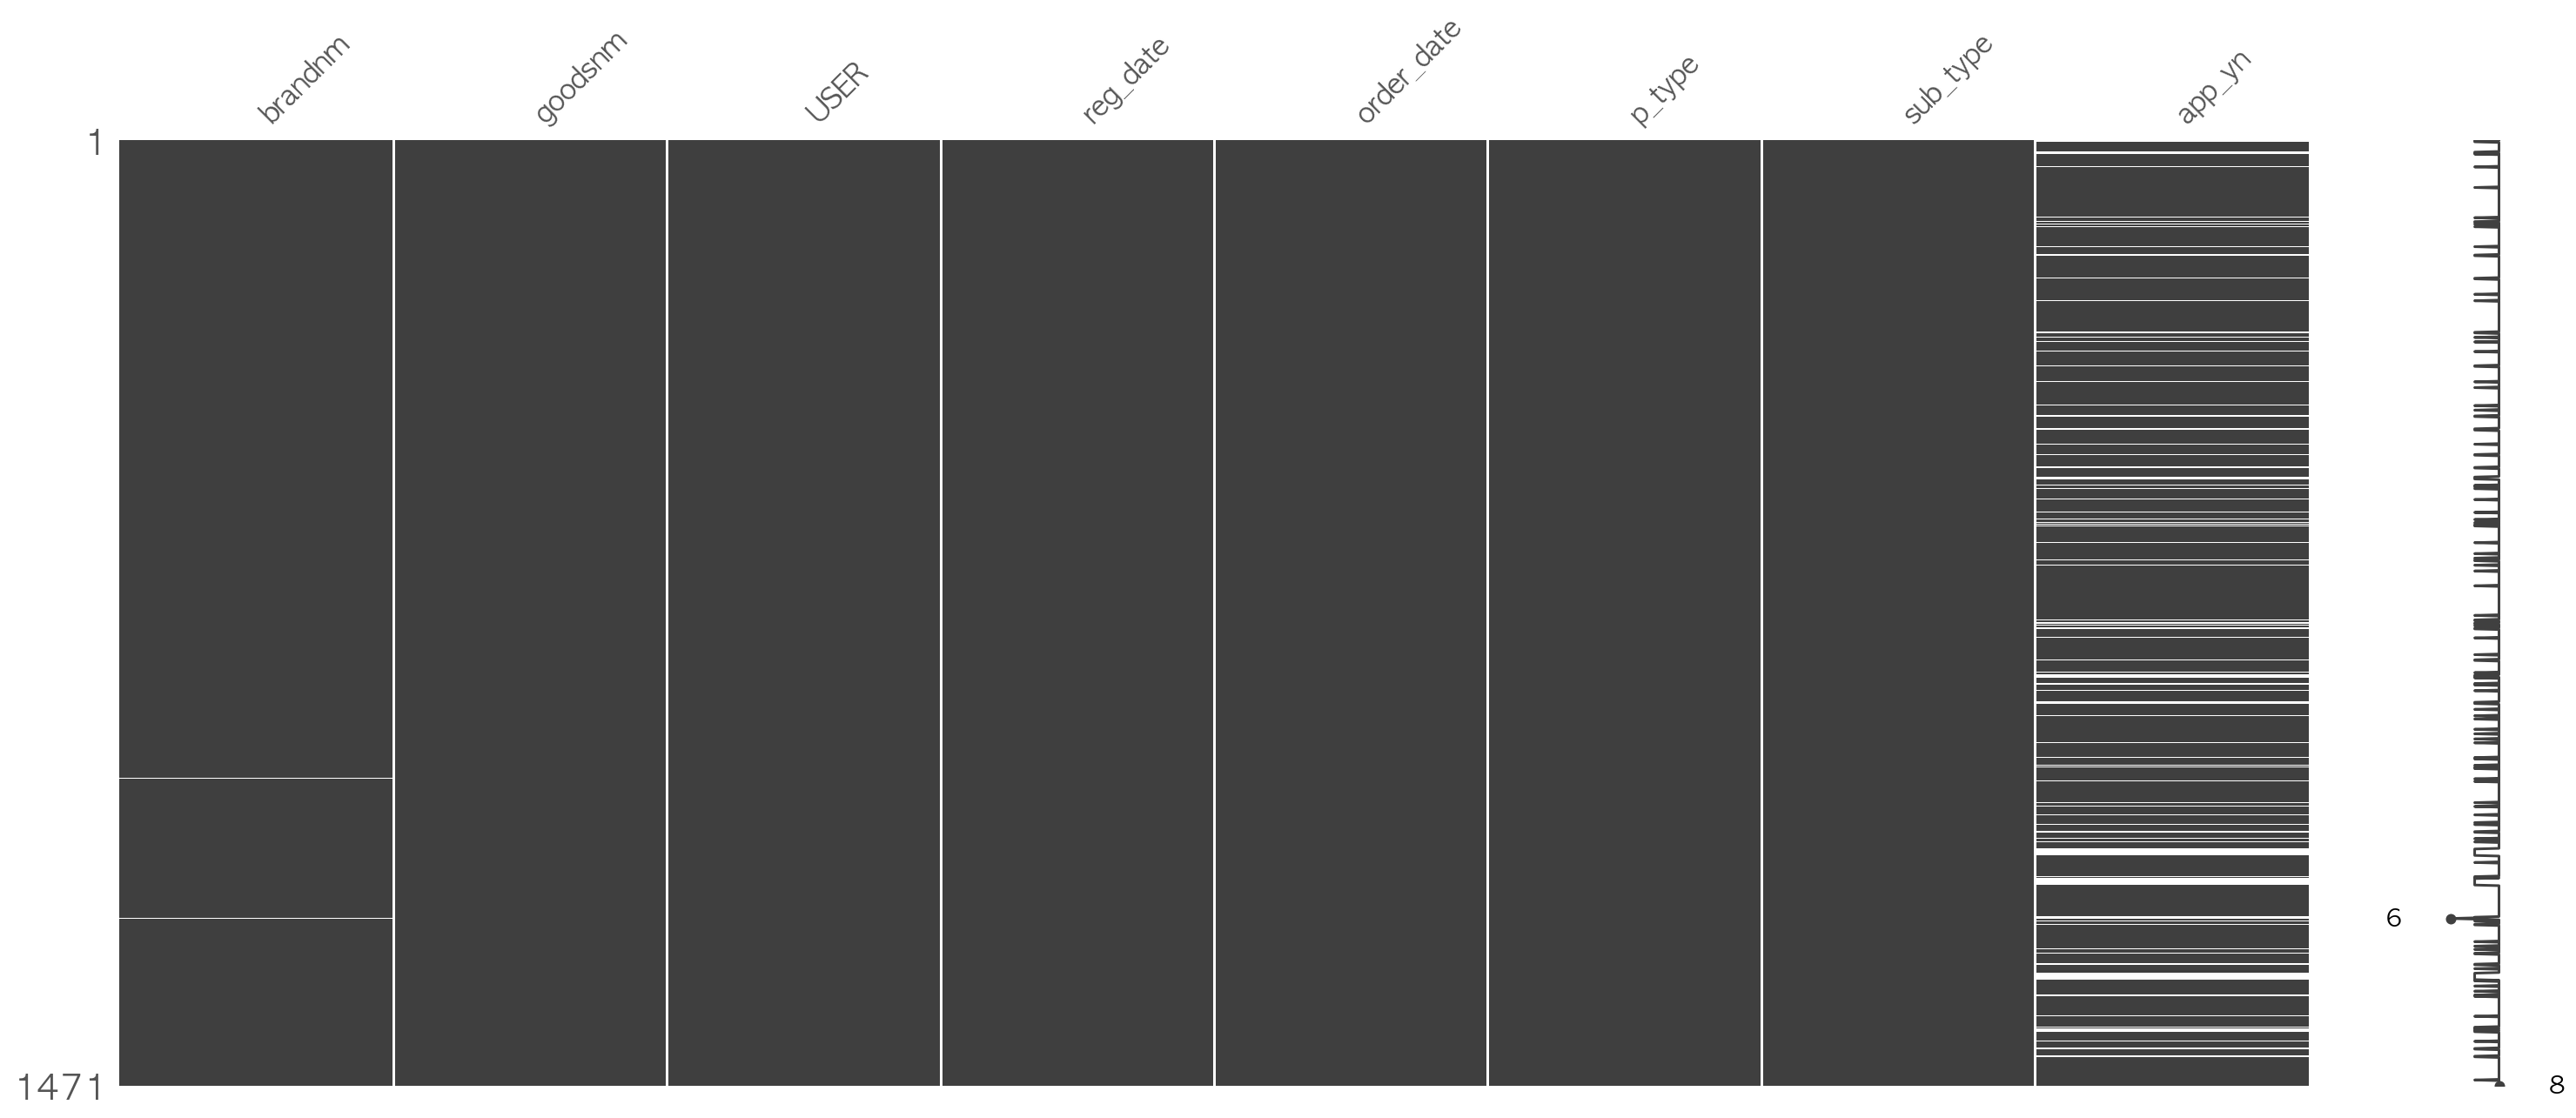

In [4]:
msno.matrix(df);

In [5]:
df.isnull().sum()

brandnm         2
goodsnm         0
USER            0
reg_date        0
order_date      0
p_type          0
sub_type        0
app_yn        176
dtype: int64

### 결측치에 N 넣어주기

In [6]:
df.fillna('N')

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,12/6/19,1/15/21,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,1/2/21,1/15/21,4days,O,N
2,Danha,embroidery point oriental mini skirt blue,a1140859,1/2/21,1/15/21,4days,B,N
3,Danha,graphics pattern top pink,a1140859,1/2/21,1/15/21,4days,T,N
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,1/1/21,1/15/21,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,4/10/19,3/1/21,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2/11/21,3/1/21,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2/28/21,3/1/21,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2/28/21,3/1/21,7days,T,Y


### 브랜드별 카운트가 10 이상인것만 보기

In [7]:
count = df.groupby('brandnm').count()['USER'].sort_values(ascending=False)[:27].reset_index()
count

,brandnm,USER
0,Gucci,232
1,Chanel,91
2,Saint Laurent,86
3,Louis Vuitton,79
4,Prada,58
5,Burberry,53
6,Yves Saint Laurent,38
7,Thom Browne,33
8,Fendi,29
9,Celine,28


<AxesSubplot:xlabel='brandnm', ylabel='USER'>

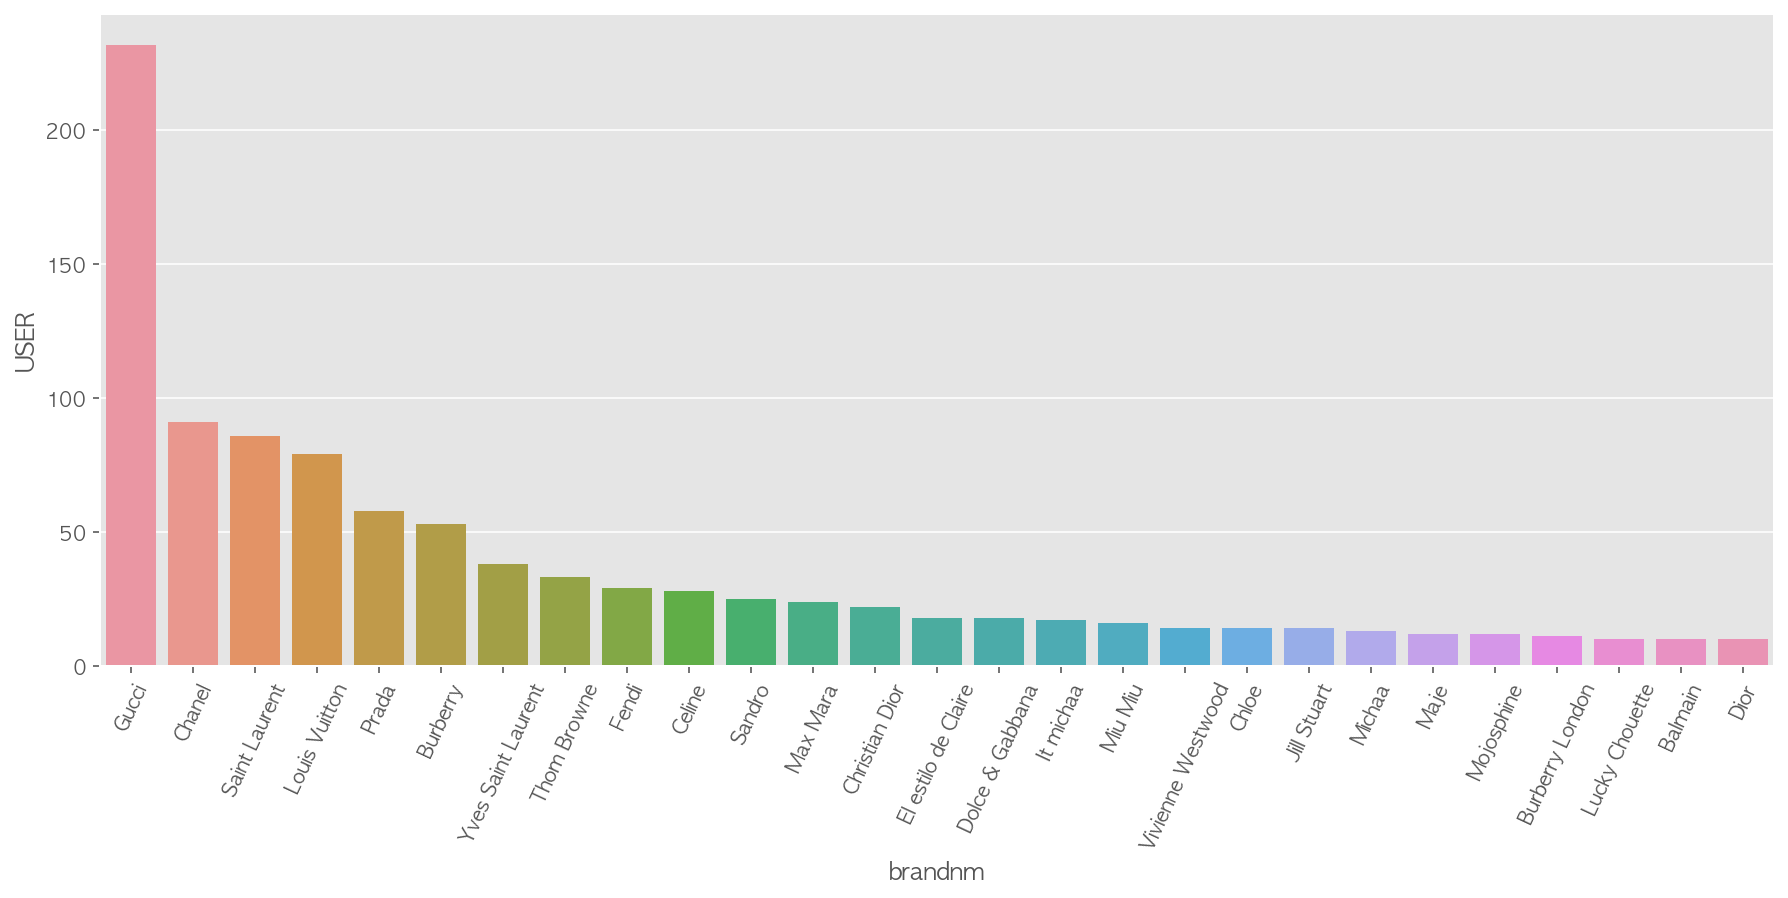

In [8]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize = fig_dims)
g = sns.barplot(data= count, x='brandnm', y='USER')
g.set_xticklabels(g.get_xticklabels(), rotation=65)
g

### 서브타입별로 카운트 값 확인해보기

In [9]:
bag = df.groupby('sub_type').count()['USER'].sort_values(ascending=False).reset_index()
bag

,sub_type,USER
0,BA,692
1,O,267
2,D,261
3,T,164
4,B,58
5,TP,29


<AxesSubplot:xlabel='sub_type', ylabel='USER'>

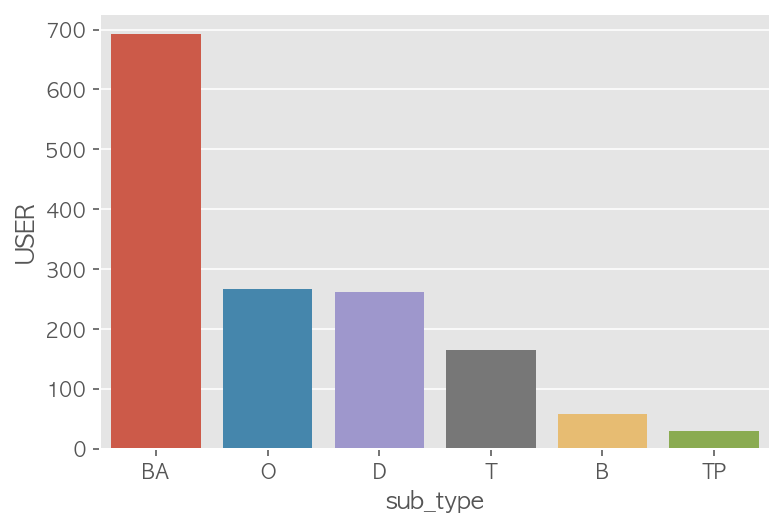

In [10]:
sns.barplot(data=bag, x='sub_type', y='USER')

### p타입별로 카운트 값 알아보기

In [11]:
p = df.groupby('p_type').count()['USER'].sort_values(ascending=False).reset_index()
p

,p_type,USER
0,4days,894
1,7days,577


<AxesSubplot:xlabel='p_type', ylabel='USER'>

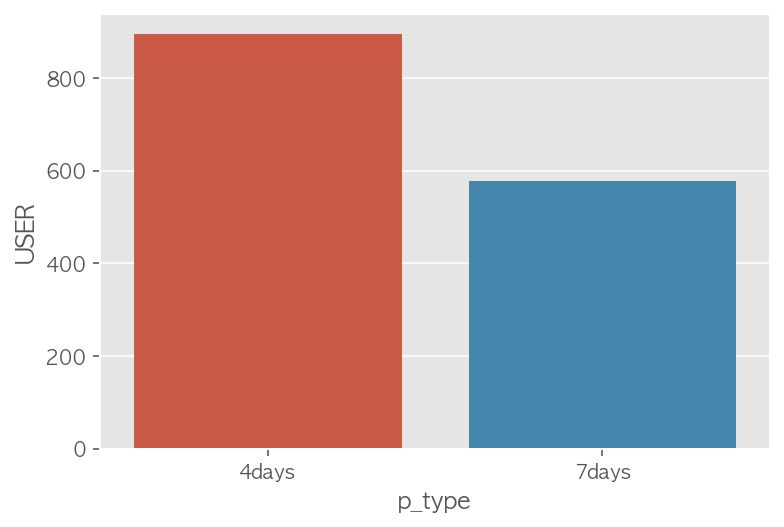

In [12]:
sns.barplot(data=p, x='p_type', y='USER')

### 가입일부터 구매를 결정한날, 경과일 알아보기

In [13]:
df['reg_date'] = pd.to_datetime(df['reg_date'])
df['order_date'] = pd.to_datetime(df['order_date'])

In [14]:
df['elapsed_day'] = (df['order_date'] - df['reg_date']).dt.days
df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,elapsed_day
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,406
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN,13
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN,13
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN,13
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,14
...,...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,691
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,18
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,1
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,1


In [15]:
df.sort_values('elapsed_day', ascending=False)

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,elapsed_day
356,Chloe,daria tote bag brown,a11612,2017-06-24,2021-01-18,7days,BA,Y,1304
305,Saint Laurent,classic tote bag black,a11803,2017-07-02,2021-01-20,4days,BA,Y,1298
840,Louis Vuitton,monogram canvas clutch bag,a13741,2018-03-20,2021-03-31,4days,BA,Y,1107
1419,Balmain,button basic pattern wool doublebreasted-jacke...,a13637,2018-03-09,2021-03-03,4days,O,Y,1090
974,Dint,side pocket wedding dress ivory,a14279,2018-04-17,2021-03-25,4days,D,Y,1073
...,...,...,...,...,...,...,...,...,...
1200,Gucci,logo pointed cross bag black,a1149652,2021-03-16,2021-03-16,7days,BA,Y,0
1199,Debb,ruffle lace dress black,a1149657,2021-03-16,2021-03-16,4days,D,Y,0
1198,Miu Miu,buckle detail tote bag orange,a1149584,2021-03-16,2021-03-16,4days,BA,Y,0
1197,Gucci,scarf tote bag,a1149658,2021-03-16,2021-03-16,7days,BA,Y,0


In [16]:
df.describe()

,elapsed_day
count,1471
mean,107
std,207
min,0
25%,1
50%,4
75%,88
max,1304


In [17]:
df['USER'].nunique()

1234

<AxesSubplot:xlabel='USER', ylabel='elapsed_day'>

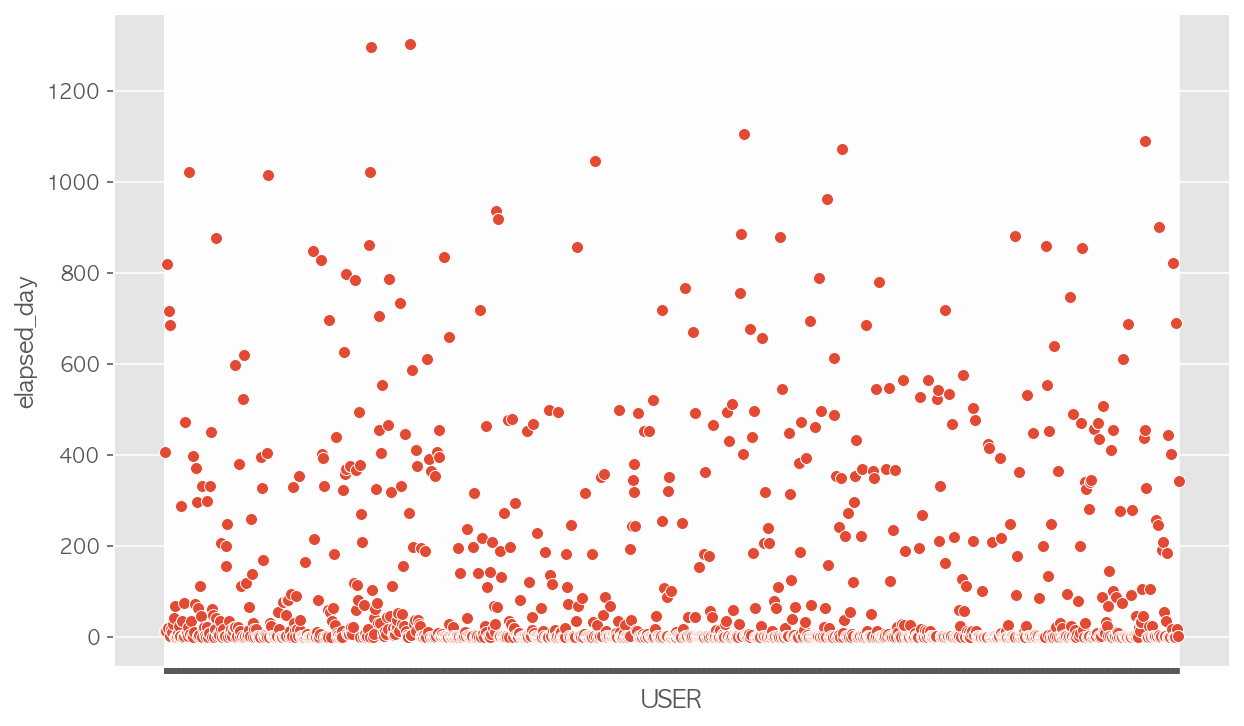

In [18]:
fig_dims = (10,6)
fig, ax = plt.subplots(figsize = fig_dims)
d = sns.scatterplot(data=df, x=df['USER'], y=df['elapsed_day'])
d.set_xticklabels(d.get_xticklabels(), rotation=90)
d

### 달별로 경과일의 차이 확인

In [19]:
jan = df['order_date'] <='2021-01-31'

In [20]:
order_jan=df.loc[jan]
order_jan

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,elapsed_day
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,406
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN,13
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN,13
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN,13
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,14
5,Prada,ruffle detail long coat,a110231,2018-10-18,2021-01-15,7days,O,Y,820
6,Max Mara,strap basic pattern wrap-coat black,a1139960,2020-12-26,2021-01-15,7days,O,Y,20
7,Molliolli,pocket basic pattern fur-outer ivory,a115159,2019-01-29,2021-01-15,4days,O,Y,717
8,Gucci,dionysus cross bag,a1143028,2021-01-14,2021-01-15,4days,BA,Y,1
9,Sandro,pattern pointed cardigan black,a117306,2019-03-02,2021-01-15,7days,O,Y,685


In [21]:
order_jan.describe()

,elapsed_day
count,377
mean,113
std,220
min,0
25%,2
50%,14
75%,81
max,1304


In [22]:
m1 = order_jan.groupby(order_jan['elapsed_day'])['USER'].sum().reset_index()
m1

,elapsed_day,USER
0,0,a1143143a1142921a1142921a1143019a1142924a11429...
1,1,a1143028a1142834a1142679a1142679a1142679a11426...
2,2,a1142328a1141007a1140937a1140937a1140738a11406...
3,3,a1141925a1141925a1144833a1144704a1144704a11443...
4,4,a1141640a1141520a1141520a1141520a1140612a11444...
5,5,a1140842a1143195a1142855a1142677a1142677a11426...
6,6,a1141580a1143880a1143880a1143759a1143269a11433...
7,7,a1140737a1143118a1143006a1142720a1142421
8,8,a1141367a1141367a1142838
9,9,a1141112a1141099a1140758a1140758a1140758a11407...


<AxesSubplot:xlabel='USER', ylabel='elapsed_day'>

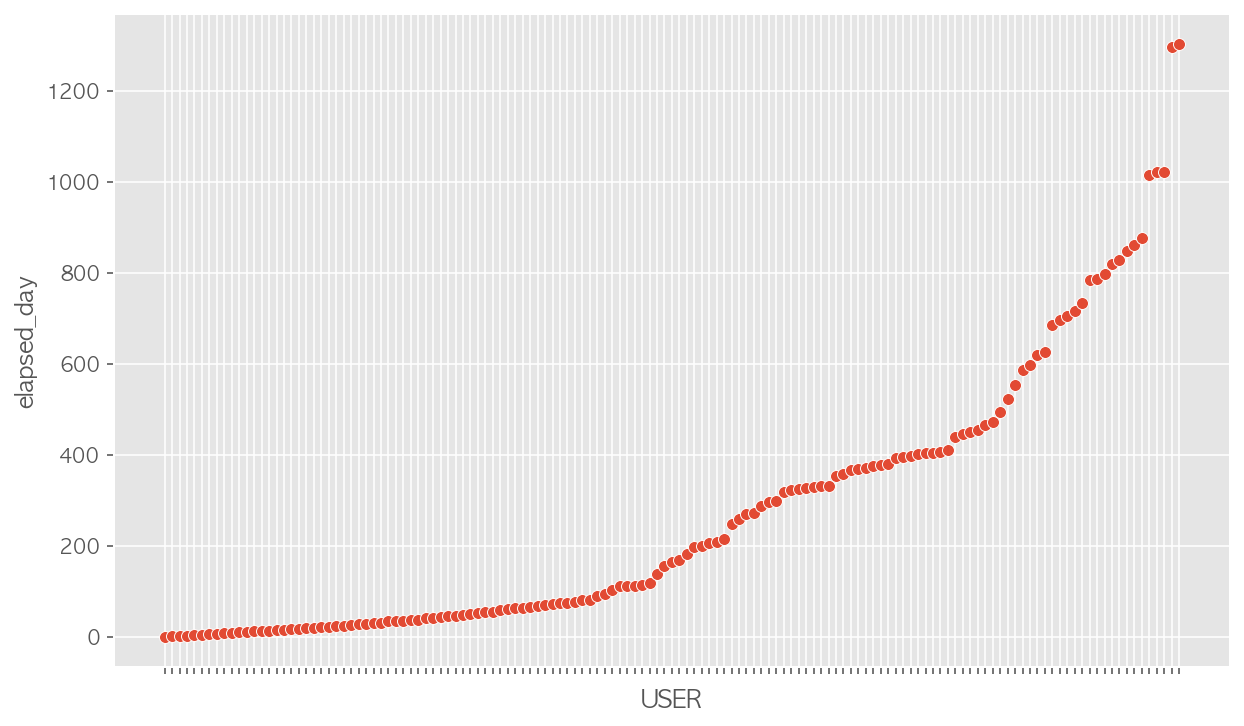

In [23]:
fig_dims = (10,6)
fig, ax = plt.subplots(figsize = fig_dims)
m1_g = sns.scatterplot(data=m1, x='USER', y='elapsed_day')
m1_g.set_xticklabels(d.get_xticklabels(), rotation=90)
m1_g

In [24]:
feb = (df['order_date'] <='2021-02-28') & (df['order_date'] > '2021-01-31')

In [25]:
order_feb = df.loc[feb]
order_feb

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,elapsed_day
377,Prada,high neck robe jumper gray,a1112637,2020-08-16,2021-02-28,7days,O,Y,196
378,Louis Vuitton,unbalance detail zip-up jumper,a1112637,2020-08-16,2021-02-28,7days,O,Y,196
379,El estilo de Claire,see-through lace dress black,a1147589,2021-02-25,2021-02-28,7days,D,Y,3
380,Banana Republic,pocket basic pattern cardigan khaki,a1147589,2021-02-25,2021-02-28,7days,O,Y,3
381,Audrey Tailor,pocket basic pattern slacks navy,a1147589,2021-02-25,2021-02-28,7days,B,Y,3
382,Vanessa Bruno Athe,basic pattern A-Line dress grey,a1147580,2021-02-25,2021-02-28,4days,D,Y,3
383,Yves Saint Laurent,kate small monogram bag beige,a1147812,2021-02-28,2021-02-28,7days,BA,Y,0
384,Max Mara,shawl collar fur detail coat gray,a1147461,2021-02-24,2021-02-28,4days,O,Y,4
385,Vivienne Westwood Red Label,logo point crop sweater wine,a1116109,2020-08-23,2021-02-28,7days,T,NaN,189
386,Chanel,quilted shoulder bag black,a1147781,2021-02-28,2021-02-28,7days,BA,Y,0


In [26]:
order_feb.describe()

,elapsed_day
count,455
mean,89
std,188
min,0
25%,0
50%,3
75%,53
max,1046


In [27]:
m2 = order_feb.groupby(order_feb['elapsed_day'])['USER'].sum().reset_index()
m2

,elapsed_day,USER
0,0,a1147812a1147781a1147714a1147643a1147623a11476...
1,1,a1147498a1147591a1147450a1147471a1147373a11474...
2,2,a1147383a1147322a1147257a1147335a1147335a11472...
3,3,a1147589a1147589a1147589a1147580a1147266a11472...
4,4,a1147461a1146975a1146851
5,5,a1146927a1145891a1145400a1144976a1144976a1144947
6,6,a1144705
7,7,a1146892a1146654a1146654a1146654a1146637a11459...
8,8,a1146865a1146366a1146366a1146366a1146366a11456...
9,9,a1146011a1145383


<AxesSubplot:xlabel='USER', ylabel='elapsed_day'>

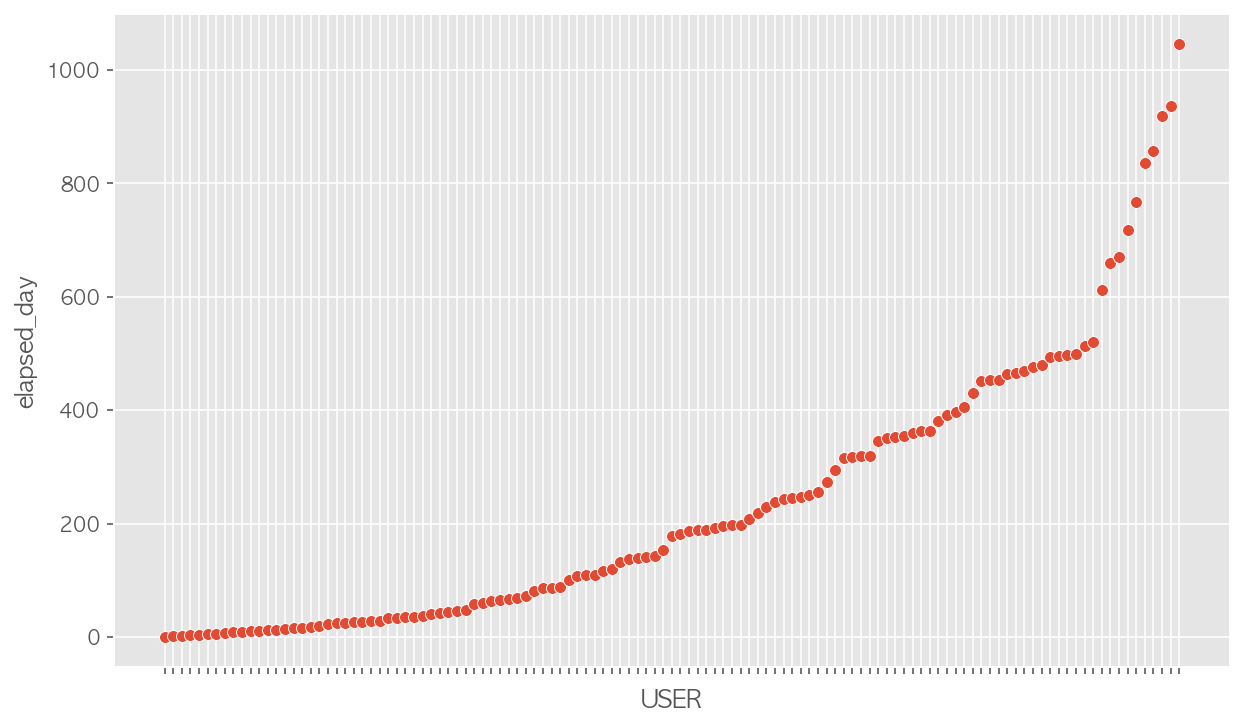

In [28]:
fig_dims = (10,6)
fig, ax = plt.subplots(figsize = fig_dims)
m2_g = sns.scatterplot(data=m2, x='USER', y='elapsed_day')
m2_g.set_xticklabels(d.get_xticklabels(), rotation=90)
m2_g

In [29]:
mar = (df['order_date'] <='2021-03-31') & (df['order_date'] > '2021-02-28')

In [30]:
order_mar = df.loc[mar]
order_mar

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,elapsed_day
832,Burberry,button check pattern H-Line dress multi,a1151196,2021-03-28,2021-03-31,7days,D,NaN,3
833,El estilo de Claire,frill stripe knit cardigan muti,a1151564,2021-03-31,2021-03-31,7days,T,NaN,0
834,Chanel,tweed jacket brown,a1148120,2021-03-03,2021-03-31,4days,O,NaN,28
835,Chloe,round handle tote bag black,a117466,2019-03-06,2021-03-31,4days,BA,Y,756
836,Gucci,vintage web shoulder bag black,a110727,2018-10-27,2021-03-31,4days,BA,NaN,886
837,McGinn,flower lace layered dress pink,a1151265,2021-03-29,2021-03-31,4days,D,Y,2
838,Max Mara,classic mood check pattern jacket,a1151260,2021-03-29,2021-03-31,7days,O,Y,2
839,Theory,belt basic pattern trench-coat black,a184442,2020-02-23,2021-03-31,4days,O,Y,402
840,Louis Vuitton,monogram canvas clutch bag,a13741,2018-03-20,2021-03-31,4days,BA,Y,1107
841,Lanvin Collection,gather basic pattern H-Line dress charcoal,a1150967,2021-03-26,2021-03-31,7days,D,Y,5


In [31]:
order_mar.describe()

,elapsed_day
count,639
mean,115
std,210
min,0
25%,0
50%,3
75%,126
max,1107


In [32]:
m3 = order_mar.groupby(order_mar['elapsed_day'])['USER'].sum().reset_index()
m3

,elapsed_day,USER
0,0,a1151564a1151496a1151499a1151465a1151481a11514...
1,1,a1151457a1151437a1151332a1151163a1151129a11510...
2,2,a1151265a1151260a1151301a1151213a1151117a11511...
3,3,a1151196a1151106a1151181a1151136a1151051a11509...
4,4,a1151046a1150732a1149207a1149207a1148569a11483...
5,5,a1150967a1150967a1150877a1150287a1150091a11499...
6,6,a1150759a1149893a1149714a1148078
7,7,a1150260a1149664a1148134
8,8,a1149812a1149243a1148769a1147505
9,9,a1148361a1148361a1147854a1147639a1147276


<AxesSubplot:xlabel='USER', ylabel='elapsed_day'>

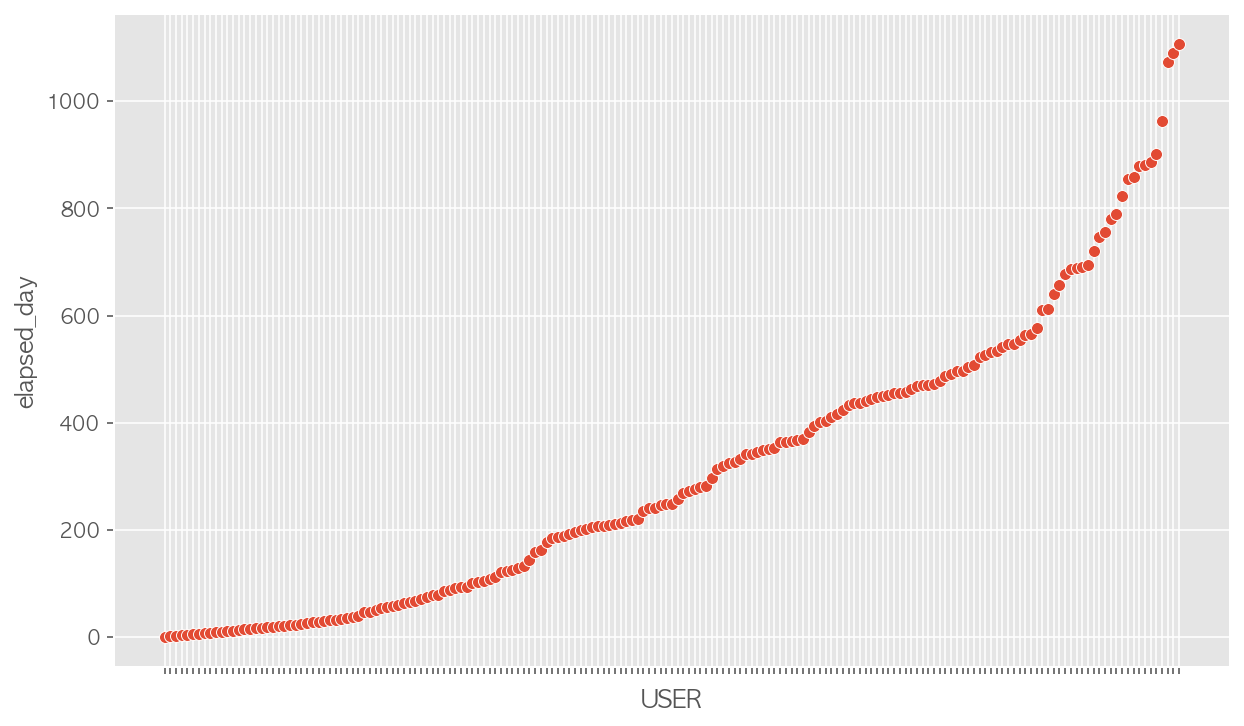

In [33]:
fig_dims = (10,6)
fig, ax = plt.subplots(figsize = fig_dims)
m3_g = sns.scatterplot(data=m3, x='USER', y='elapsed_day')
m3_g.set_xticklabels(d.get_xticklabels(), rotation=90)
m3_g

### 월별 구입자의 구매까지의 경과일

[]

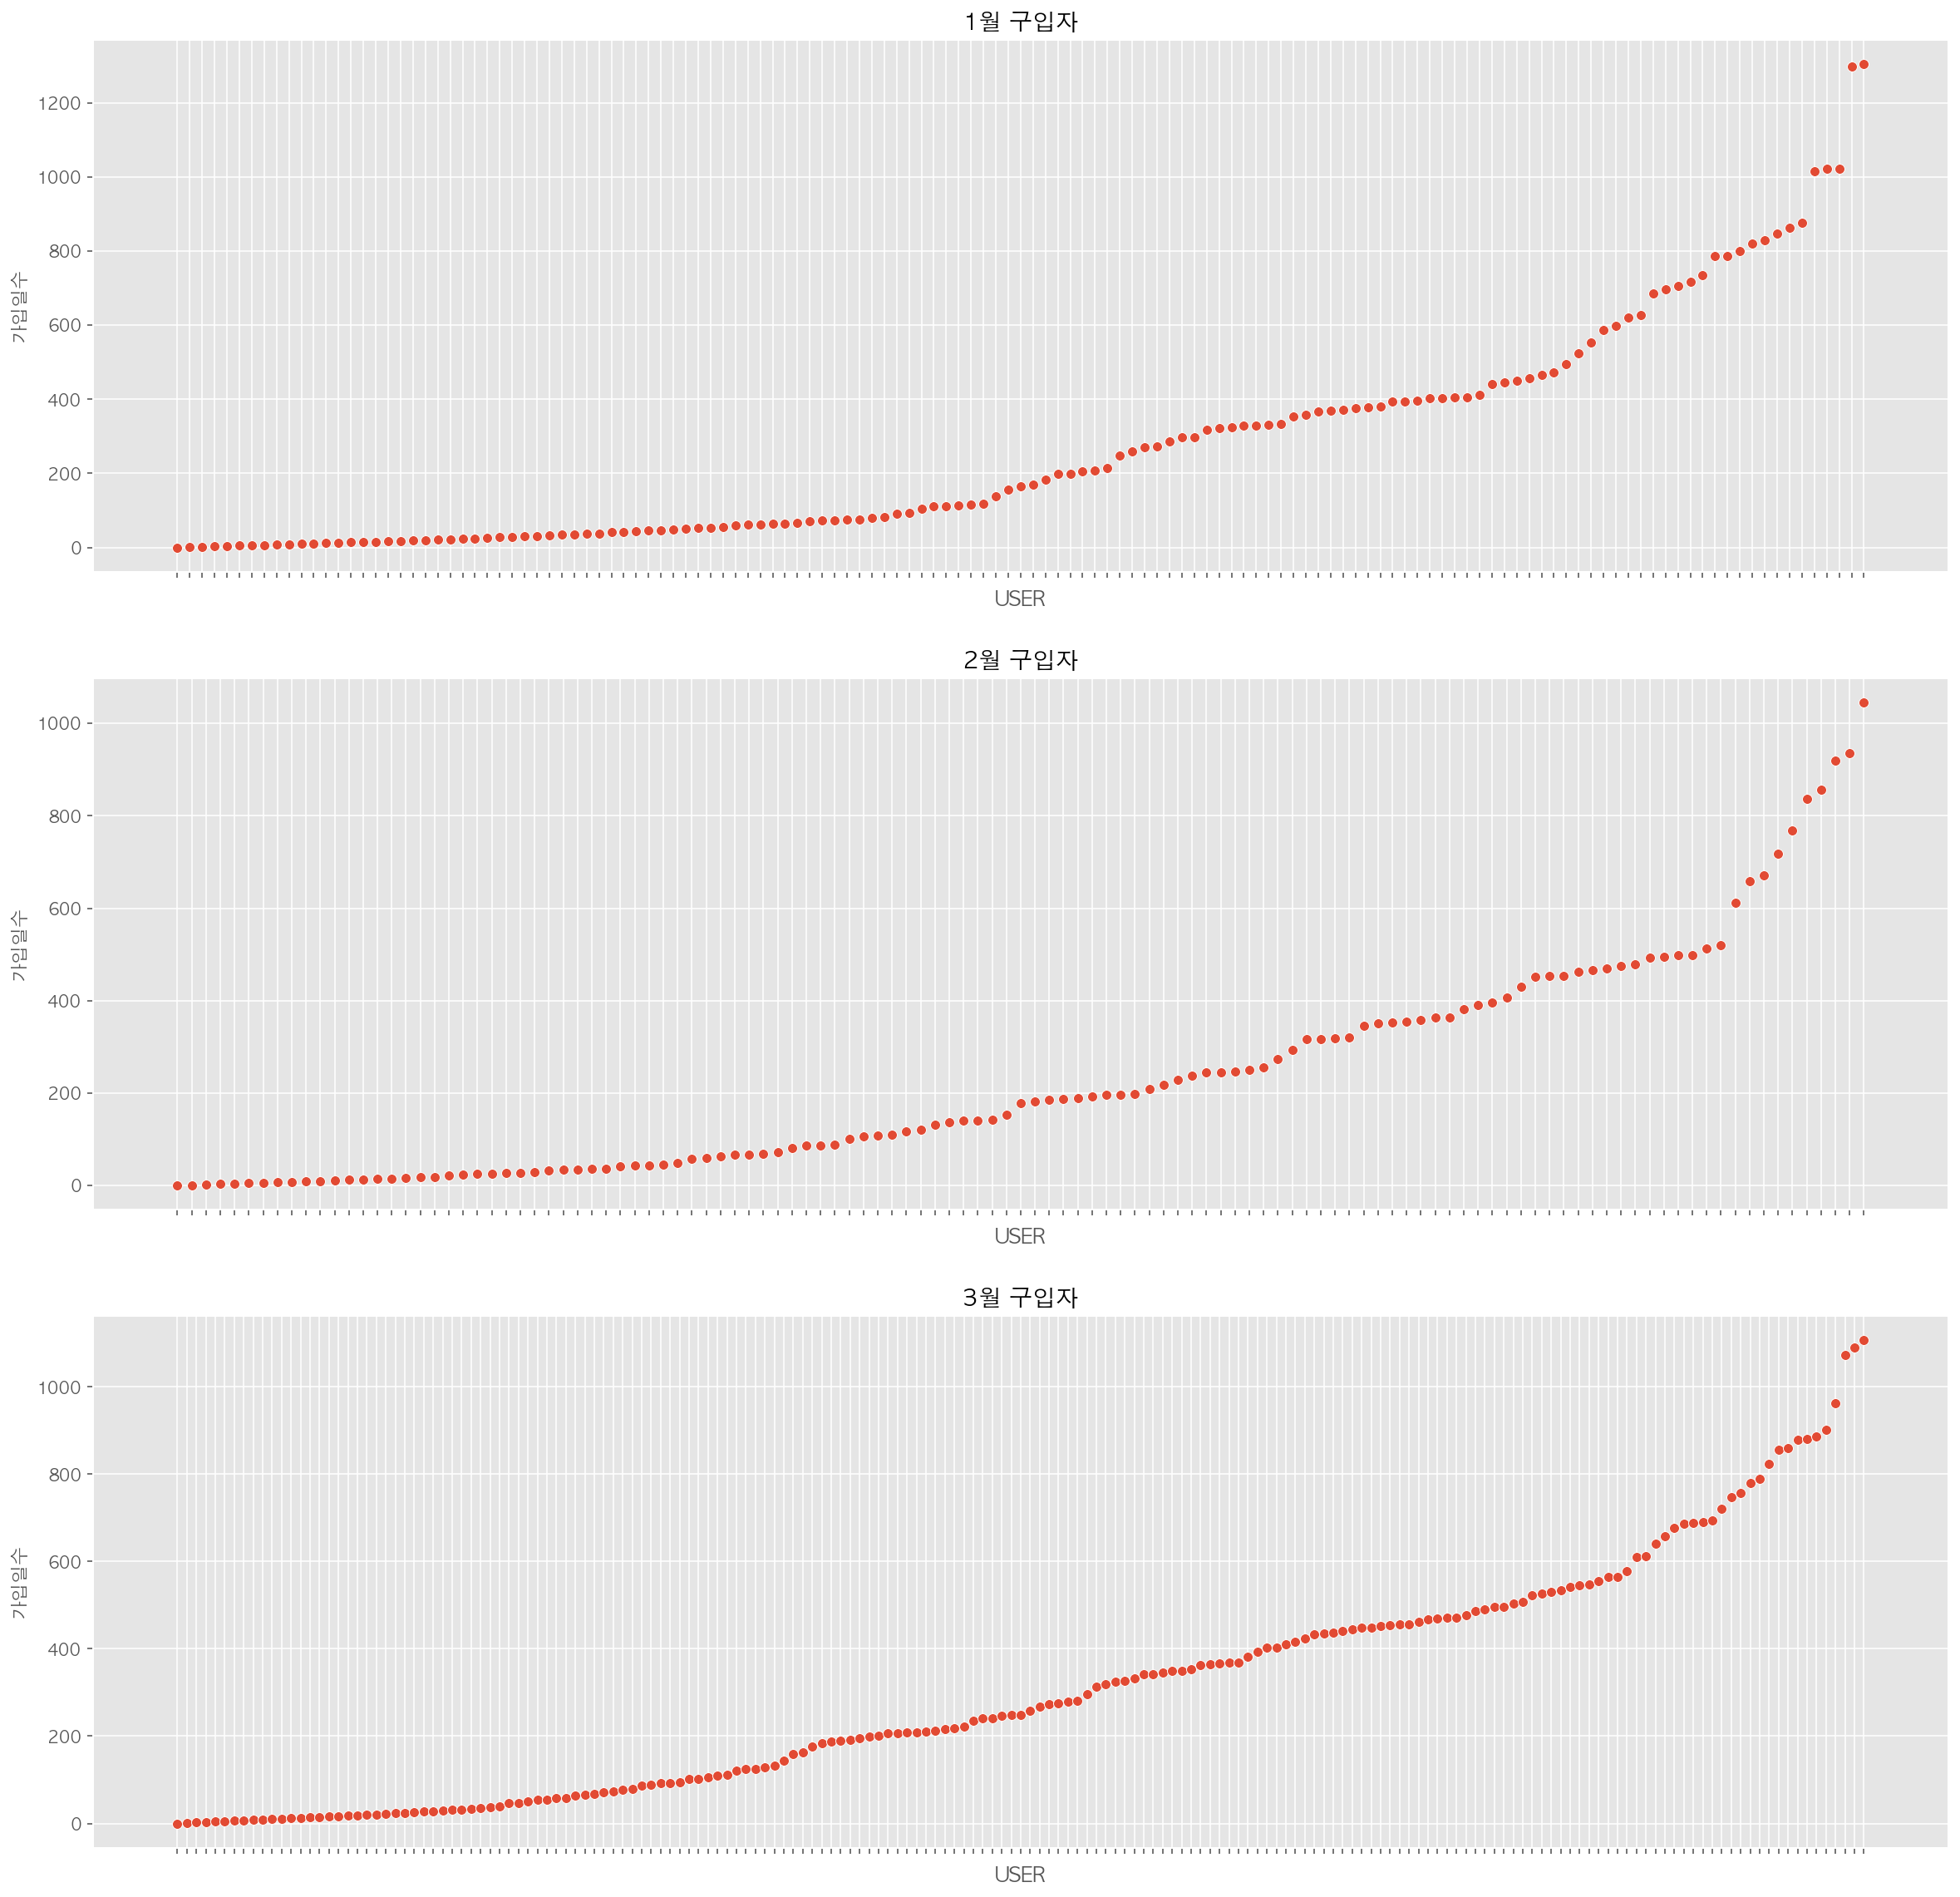

In [57]:
fig_dims= (20,20)
fig, axes = plt.subplots(nrows=3, figsize= fig_dims)
m1_1 = sns.scatterplot(data=m1, x='USER', y='elapsed_day', ax=axes[0])
m1_1.set_xticklabels(d.get_xticklabels(), rotation=90)
axes[0].set_title('1월 구입자',  fontsize=14)
axes[0].set_ylabel('가입일수', fontsize=11)

m1_2 = sns.scatterplot(data=m2, x='USER', y='elapsed_day', ax=axes[1])
m1_2.set_xticklabels(d.get_xticklabels(), rotation=90)
axes[1].set_title('2월 구입자',  fontsize=14)
axes[1].set_ylabel('가입일수', fontsize=11)

m1_3 = sns.scatterplot(data=m3, x='USER', y='elapsed_day', ax=axes[2])
m1_3.set_xticklabels(d.get_xticklabels(), rotation=90)
axes[2].set_title('3월 구입자',  fontsize=14)
axes[2].set_ylabel('가입일수', fontsize=11)



plt.plot()

### 월별 구입자가 몇명인지

In [66]:
order_jan['USER'].nunique()

311

In [67]:
order_feb['USER'].nunique()

385

In [68]:
order_mar['USER'].nunique()

538

In [69]:
df['USER'].nunique()

1234

### 월별 서브타입별 현황 확인

In [70]:
jan_bag = order_jan.groupby('sub_type').count()['USER'].sort_values(ascending=False).reset_index()
jan_bag

,sub_type,USER
0,BA,148
1,O,83
2,D,64
3,T,60
4,B,11
5,TP,11


<AxesSubplot:xlabel='sub_type', ylabel='USER'>

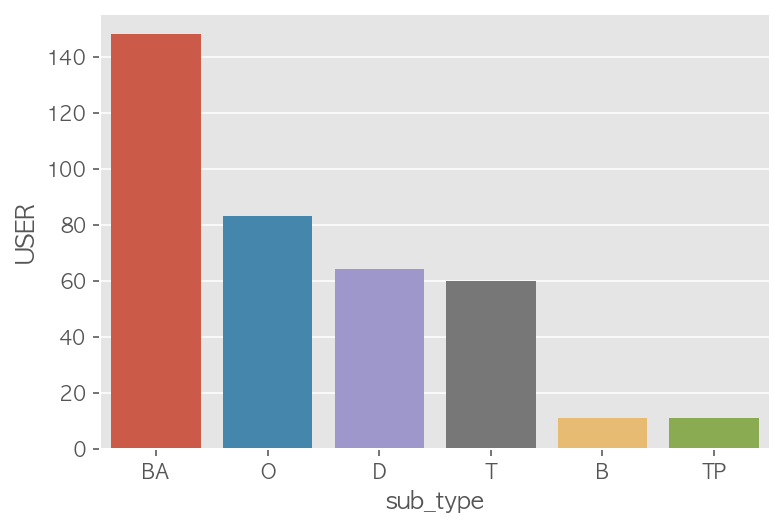

In [71]:
sns.barplot(data=jan_bag, x='sub_type', y='USER')

In [72]:
feb_bag = order_feb.groupby('sub_type').count()['USER'].sort_values(ascending=False).reset_index()
feb_bag

,sub_type,USER
0,BA,234
1,O,97
2,D,69
3,T,39
4,B,9
5,TP,7


<AxesSubplot:xlabel='sub_type', ylabel='USER'>

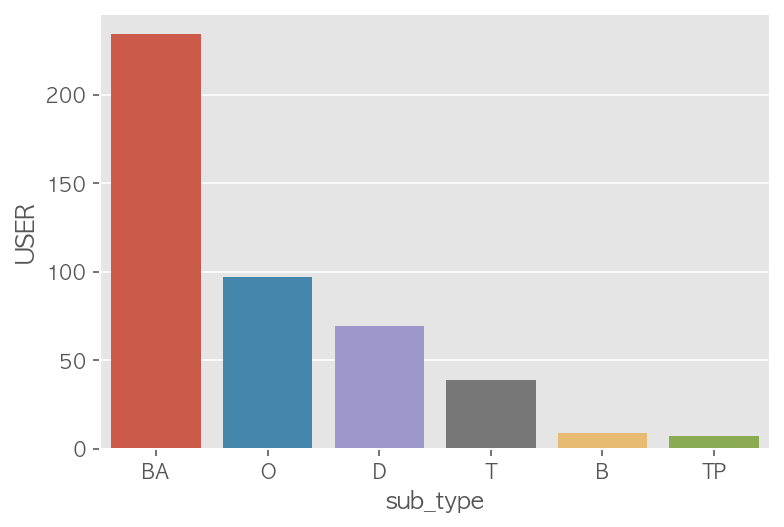

In [73]:
sns.barplot(data=feb_bag, x='sub_type', y='USER')

In [74]:
mar_bag = order_mar.groupby('sub_type').count()['USER'].sort_values(ascending=False).reset_index()
mar_bag

,sub_type,USER
0,BA,310
1,D,128
2,O,87
3,T,65
4,B,38
5,TP,11


<AxesSubplot:xlabel='sub_type', ylabel='USER'>

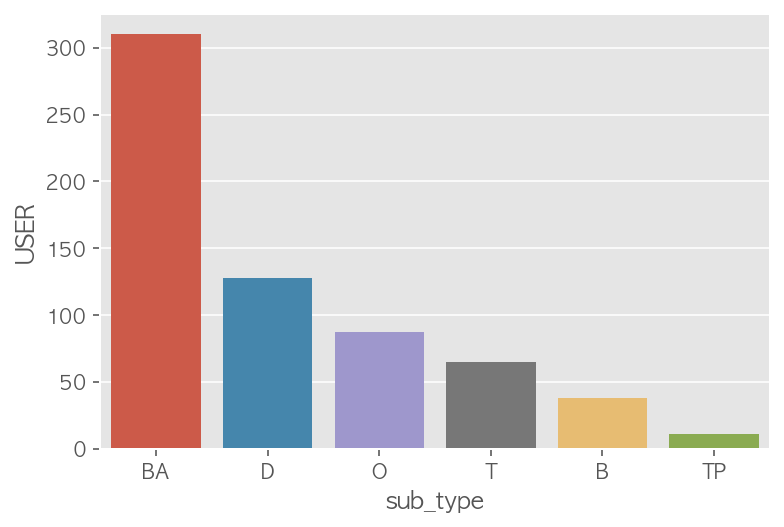

In [75]:
sns.barplot(data=mar_bag, x='sub_type', y='USER')

[]

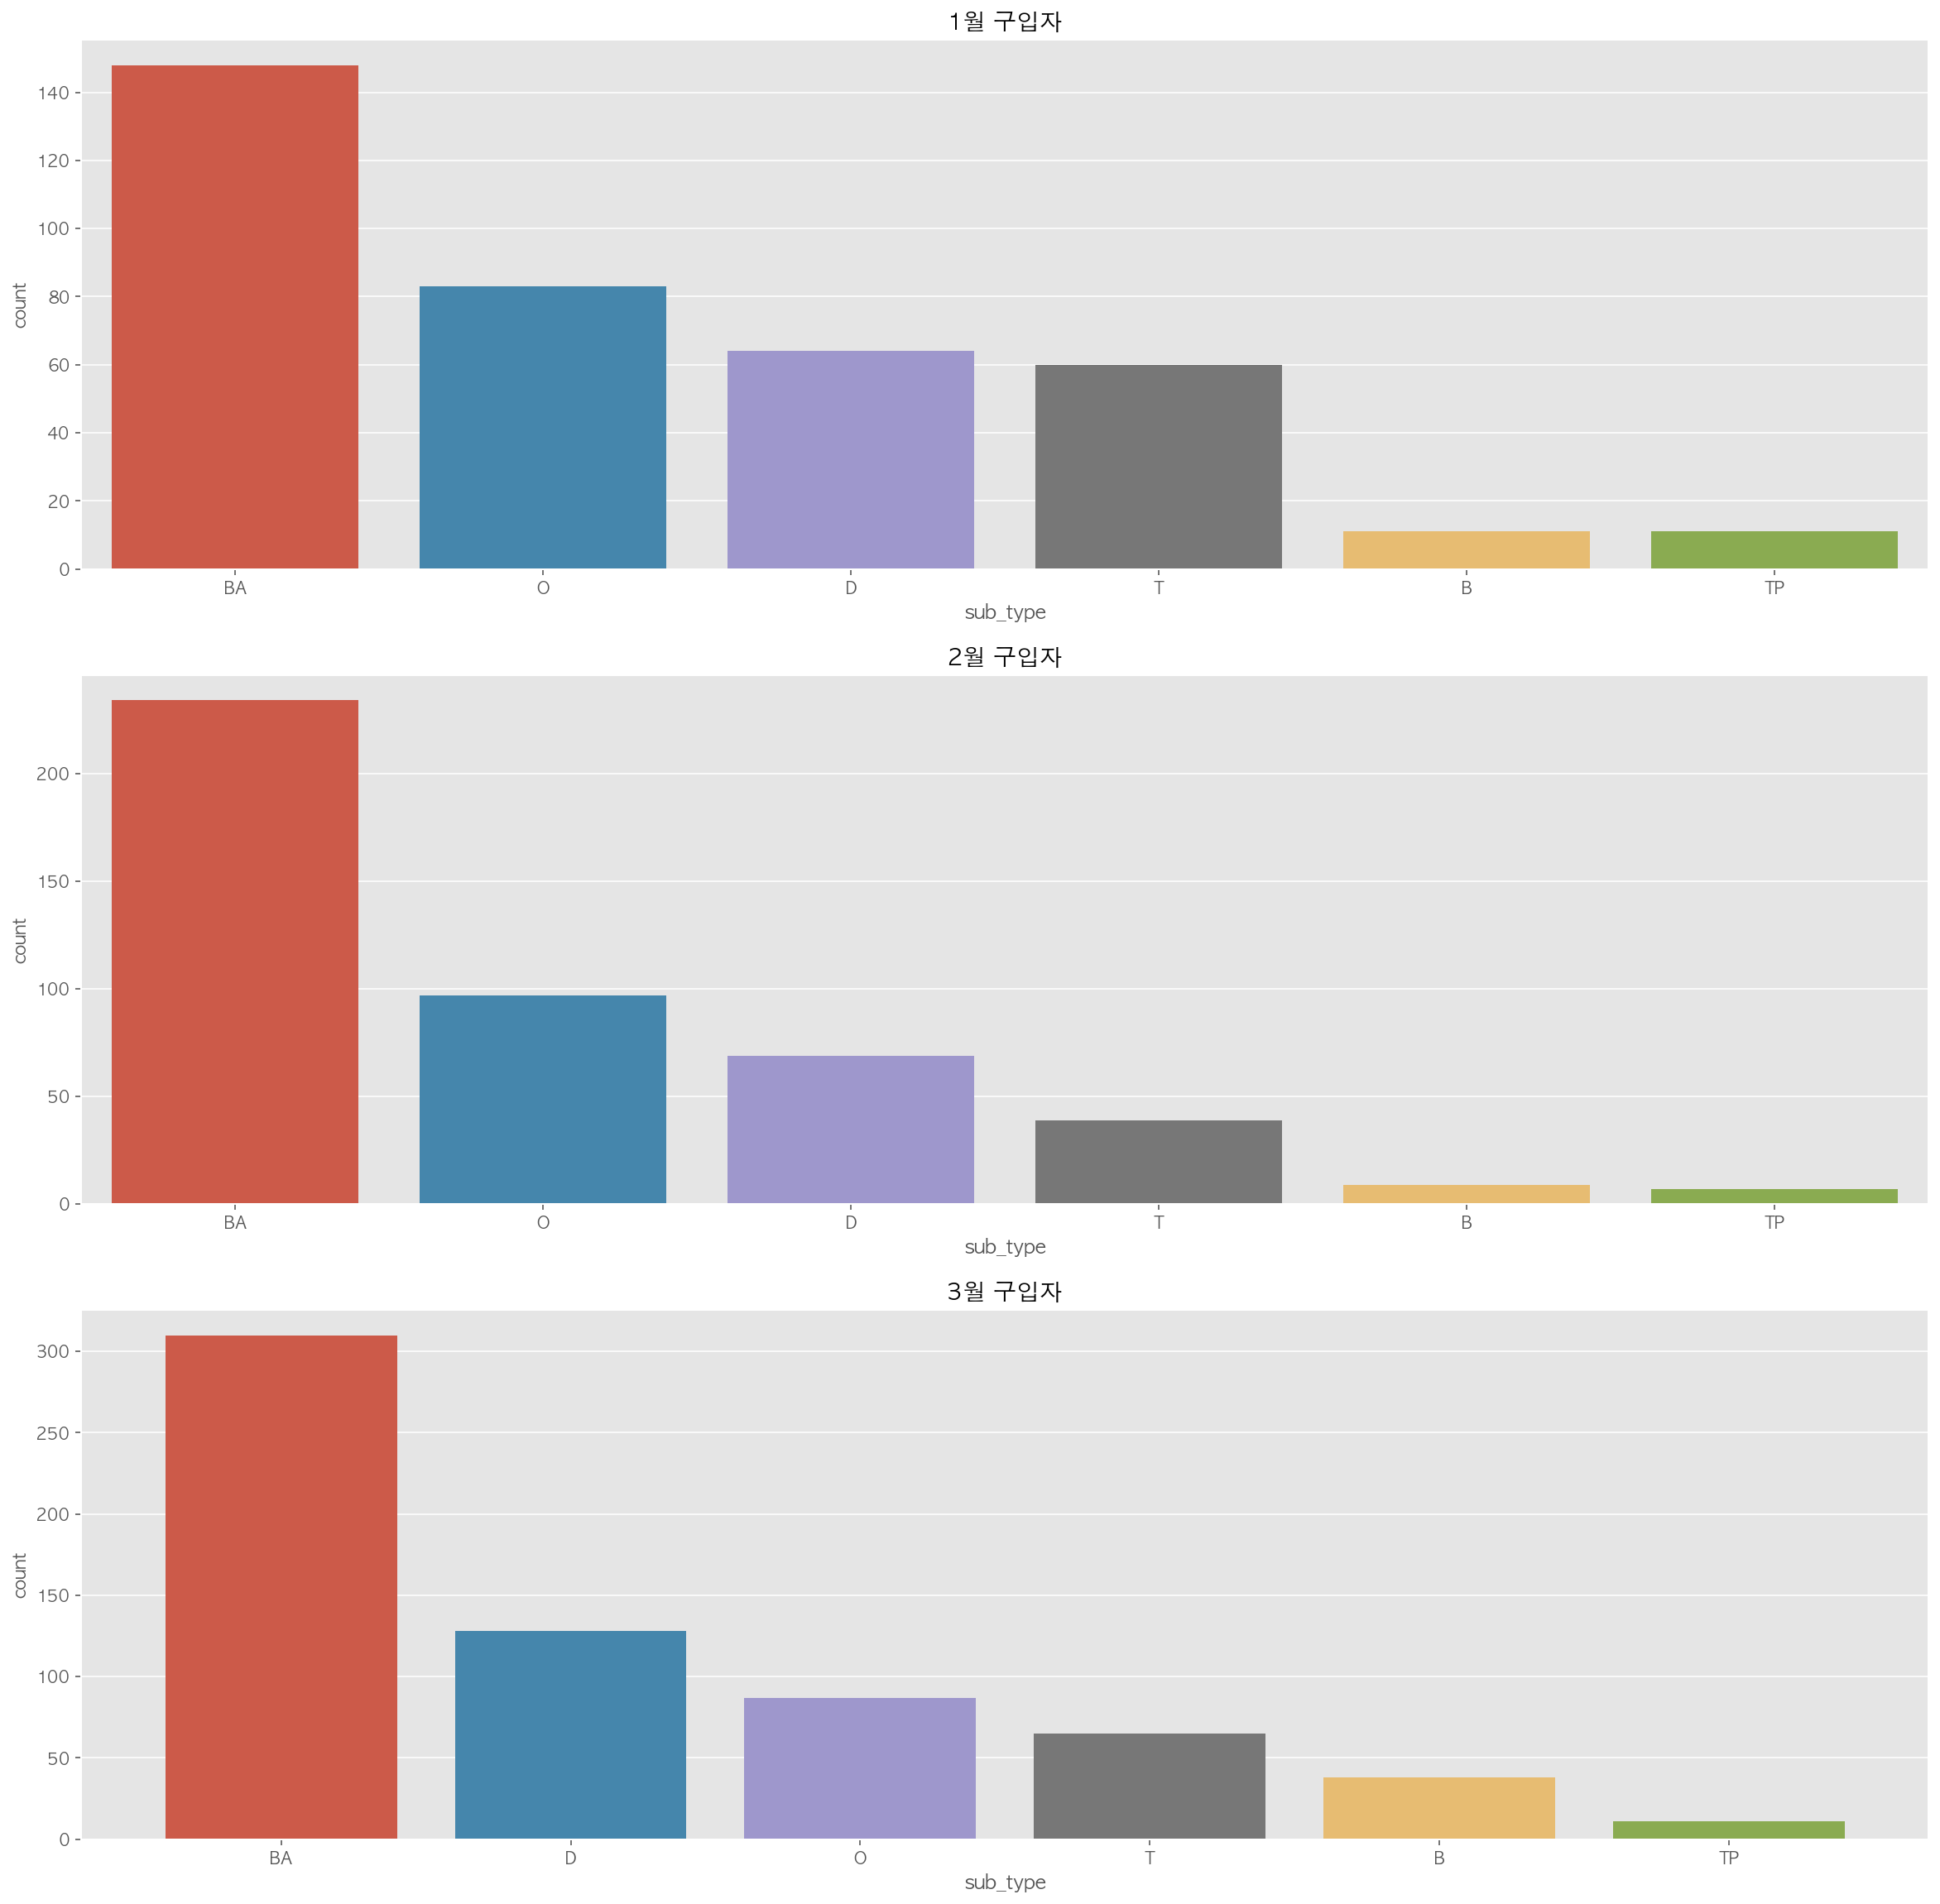

In [77]:
fig_dims= (20,20)
fig, axes = plt.subplots(nrows=3, figsize= fig_dims)
bag_1 = sns.barplot(data=jan_bag, x='sub_type', y='USER', ax=axes[0])
axes[0].set_title('1월 구입자',  fontsize=14)
axes[0].set_ylabel('count', fontsize=11)

bag_2 = sns.barplot(data=feb_bag, x='sub_type', y='USER', ax=axes[1])
axes[1].set_title('2월 구입자',  fontsize=14)
axes[1].set_ylabel('count', fontsize=11)

bag_3 = sns.barplot(data=mar_bag, x='sub_type', y='USER', ax=axes[2])
axes[2].set_title('3월 구입자',  fontsize=14)
axes[2].set_ylabel('count', fontsize=11)



plt.plot()

### 가방과 드레스의 수요는 점차 늘어나며, 아우터의 경우는 날씨가 따뜻해지면서 내려가는 추세, 

In [83]:
month_list = [
    (df['order_date'] <='2021-01-31'),
    (df['order_date'] <='2021-02-28') & (df['order_date'] >'2021-01-31'),
    (df['order_date'] <='2021-03-31') * (df['order_date'] >'2021-02-28')]

indi_list = ['1월구매자', '2월구매자', '3월구매자']

df['월별구매자'] = np.select(month_list, indi_list)
df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,elapsed_day,월별구매자
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,406,1월구매자
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN,13,1월구매자
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN,13,1월구매자
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN,13,1월구매자
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,14,1월구매자
...,...,...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,691,3월구매자
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,18,3월구매자
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,1,3월구매자
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,1,3월구매자


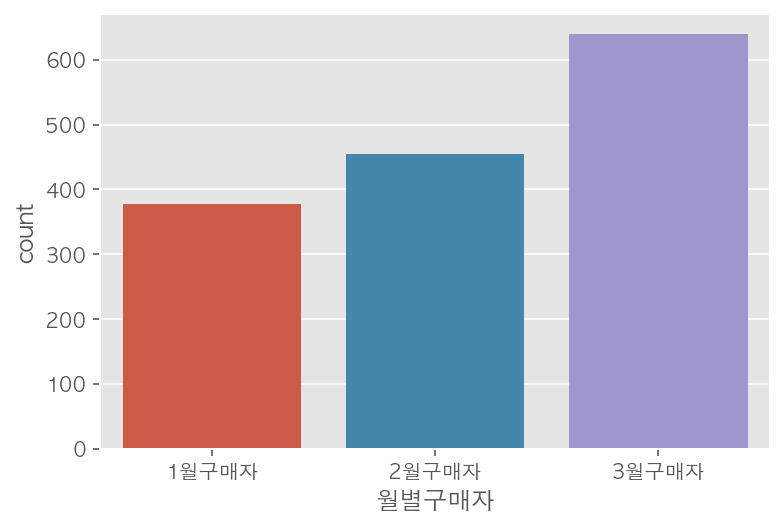

In [84]:
sns.countplot(x='월별구매자', data=df)
plt.show()

In [94]:
buyer_type = df.groupby(['sub_type', '월별구매자']).count()['USER'].sort_values(ascending=False).reset_index()
buyer_type

,sub_type,월별구매자,USER
0,BA,3월구매자,310
1,BA,2월구매자,234
2,BA,1월구매자,148
3,D,3월구매자,128
4,O,2월구매자,97
5,O,3월구매자,87
6,O,1월구매자,83
7,D,2월구매자,69
8,T,3월구매자,65
9,D,1월구매자,64


<AxesSubplot:xlabel='sub_type', ylabel='USER'>

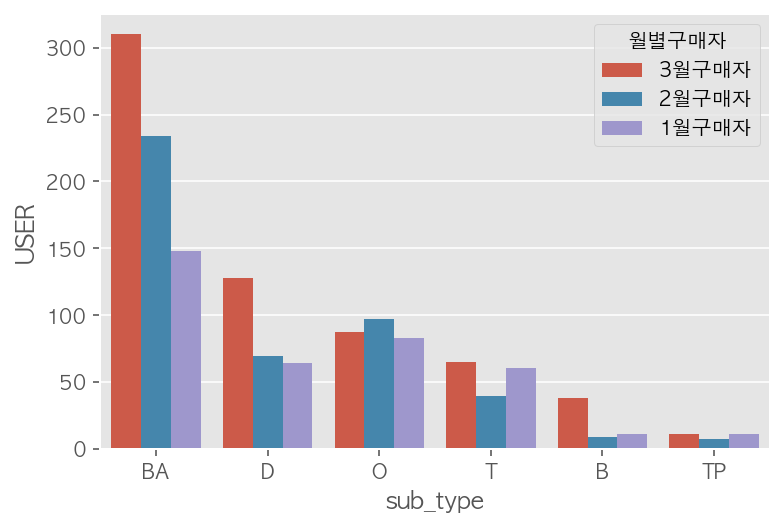

In [95]:
sns.barplot(data = buyer_type, x='sub_type', y='USER', hue='월별구매자')

In [98]:
buyer_brand = df.groupby(['brandnm', '월별구매자']).count()['USER'].sort_values(ascending=False)[:30].reset_index()
buyer_brand

,brandnm,월별구매자,USER
0,Gucci,3월구매자,101
1,Gucci,2월구매자,76
2,Gucci,1월구매자,55
3,Chanel,3월구매자,39
4,Louis Vuitton,3월구매자,39
5,Chanel,2월구매자,37
6,Saint Laurent,3월구매자,34
7,Saint Laurent,2월구매자,31
8,Burberry,3월구매자,29
9,Louis Vuitton,2월구매자,27


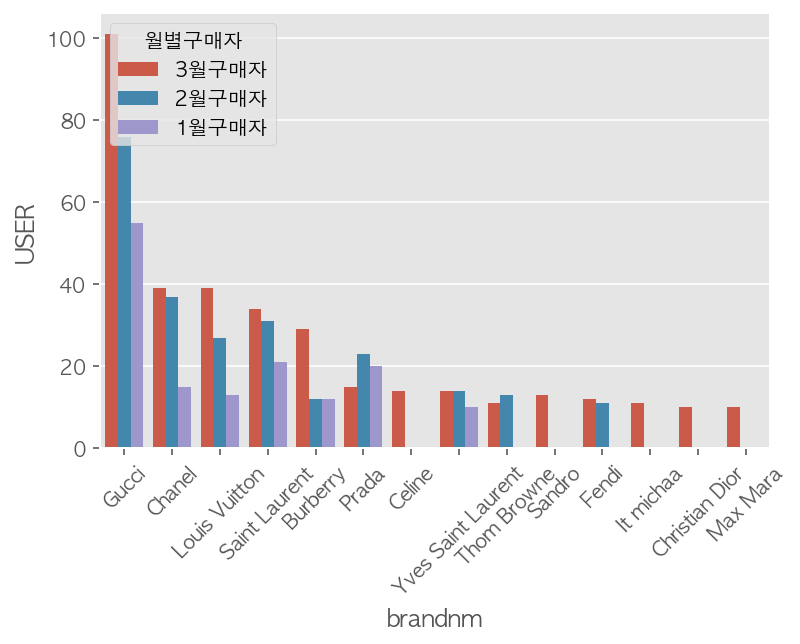

In [102]:
sns.barplot(data = buyer_brand, x='brandnm', y='USER', hue='월별구매자')
plt.xticks(rotation = 45)
plt.show()

### 카운트 수 30넘는 브랜드만 추출해서 확인